# Experimentation with the StarGAN-VC model with different number of speakers
## ASV evaluation with the anonymized audiofiles by increasing the number of speakers
1. The number of speakers is slowly increased by 10, 25 or 50 for both ignorant and lazy-informed scenario
2. We run the experiments multiple times for different target selections (i.e. different seeds)
3. The added speakers are randomly sampled 10 times for smaller datasets and 5 times for larger ones from the entire speaker population to avoid any bias (Srivastava et al., 2022) 

<b> Hypothesis</b>: The EER of the ASV system will increase, as the number of source speakers
increases. A larger population of speakers will escalate the system’s task complexity due to the necessity of detecting a greater number of non-matching speaker pairs, thereby leading to a higher error rate <br>

The following datasets from LibriSpeech are evaluated:
1. ls-test-clean
2. ls-test-other
3. ls-train-clean-100
4. ls-train-other-500

In [26]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt



### 1. Evaluation with ls-test-clean and ls-test-other (73 speakers)
The speakers are increased by 10. We run the experiments for 5 different target selections (seeds).

In [27]:
file_pattern = "results_speakers/results_stargan_speakers/ls-test-clean-other/stargan_tco_speakers#*.txt" 

##### Individual Evaluation

In [28]:
all_files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
dfs = []

for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100

    # Calculating mean and standard deviation for EER in both scenarios
    eer_ignorant_stats = df.groupby('num_of_speakers')['eer_ignorant'].agg(['mean', 'std'])
    eer_lazy_informed_stats = df.groupby('num_of_speakers')['eer_lazy-informed'].agg(['mean', 'std'])
    
     # Enhancing clarity by specifying scenario names
    eer_ignorant_stats.columns = pd.MultiIndex.from_product([['Ignorant'], eer_ignorant_stats.columns])
    eer_lazy_informed_stats.columns = pd.MultiIndex.from_product([['Lazy-Informed'], eer_lazy_informed_stats.columns])

    # Combining both stats into a single DataFrame for a unified table
    combined_stats = pd.concat([eer_ignorant_stats, eer_lazy_informed_stats], axis=1)

    print(f"\nStatistics for seed: {df['file'].iloc[0]}")
    display(combined_stats)
    



Statistics for seed: 1712187221


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
10               30.444444  9.745211     23.222222  3.027650
20               34.657895  5.533047     22.763158  6.205172
30               36.689655  3.959808     23.482759  5.176180
40               34.141026  1.690747     22.858974  2.186828
50               36.857143  2.007120     23.171429  2.225735
60               36.186441  2.341546     24.276836  1.167260
70               35.144928  0.874634     23.610766  0.503557


Statistics for seed: 1712004865


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
10               30.555556  6.781420     19.222222  8.980431
20               36.289474  5.615200     23.894737  4.848466
30               35.666667  3.502589     22.218391  3.133792
40               39.282051  2.031606     23.006410  2.052709
50               35.644898  1.971929     23.016327  2.382315
60               36.615819  1.432366     21.813559  0.939802
70               37.569358  0.821577     22.743271  0.580080


Statistics for seed: 1716131354


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
10               37.666667  7.611314     22.888889  8.813920
20               31.763158  2.514845     18.394737  6.041466
30               33.540230  2.198830     22.908046  2.323361
40               33.294872  2.972089     21.455128  1.674446
50               34.963265  1.233251     24.379592  1.554146
60               34.491525  1.606045     23.460452  1.607162
70               33.929607  1.067925     23.453416  0.821975


Statistics for seed: 1712187226


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
10               36.333333  4.836844     17.888889  7.529776
20               36.842105  1.772657     17.631579  6.441324
30               37.195402  2.377741     21.632184  2.541309
40               36.993590  3.133855     19.826923  2.056983
50               39.183673  2.935443     21.024490  1.695561
60               38.307910  1.563605     21.562147  2.269238
70               37.983437  1.276557     20.894410  0.845180


Statistics for seed: 1712187135


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
10               41.666667  3.767961     16.333333  9.040376
20               35.894737  6.814468     28.500000  5.873051
30               32.839080  3.734659     22.551724  4.569706
40               32.916667  3.784427     21.224359  1.281530
50               33.277551  0.879637     21.946939  2.238097
60               34.728814  0.843292     22.435028  1.813270
70               34.863354  1.251677     22.652174  1.145926

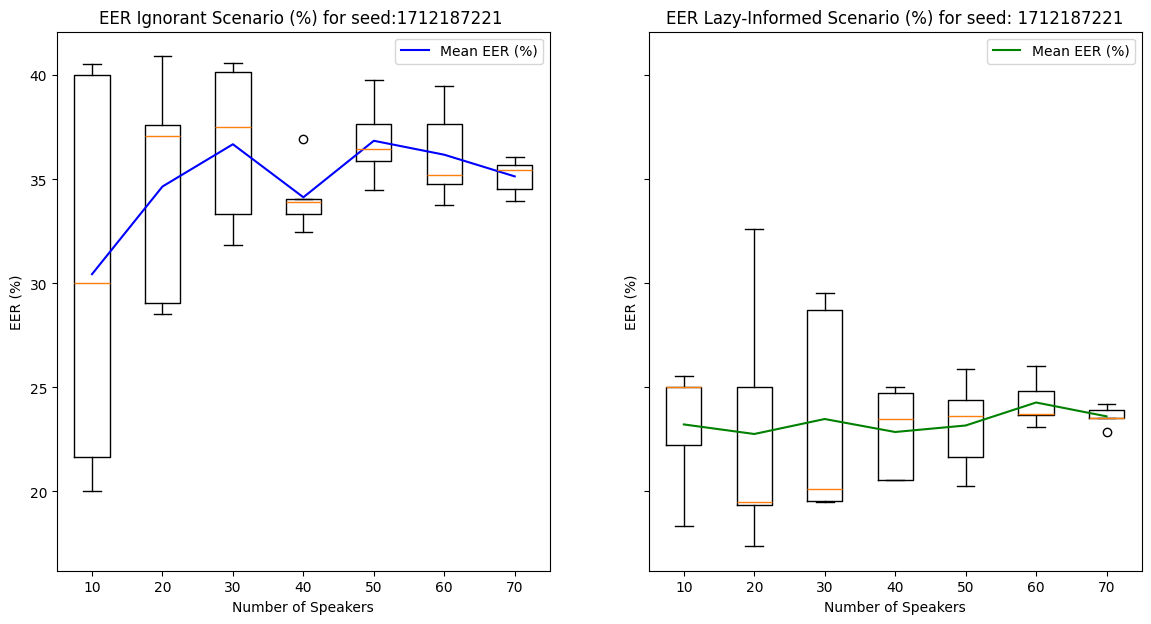

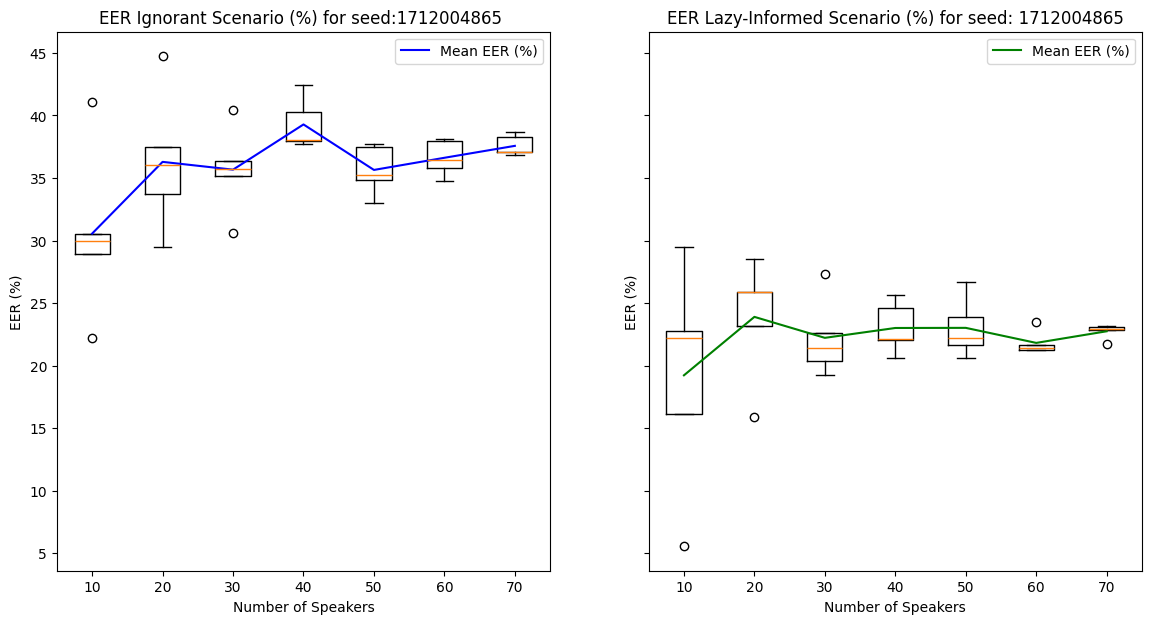

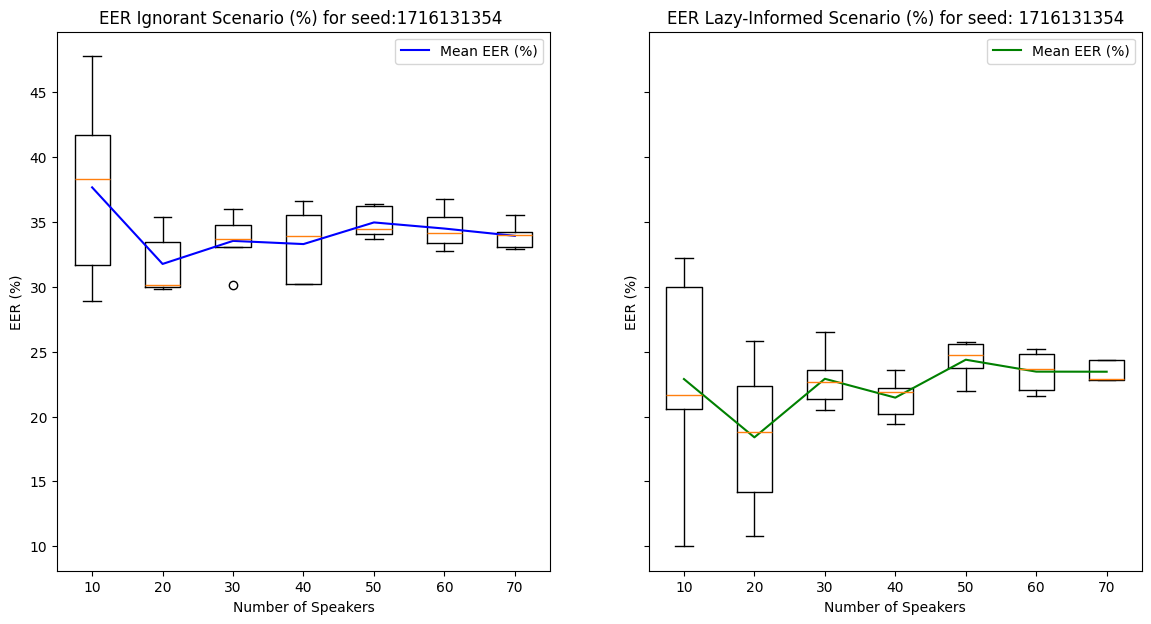

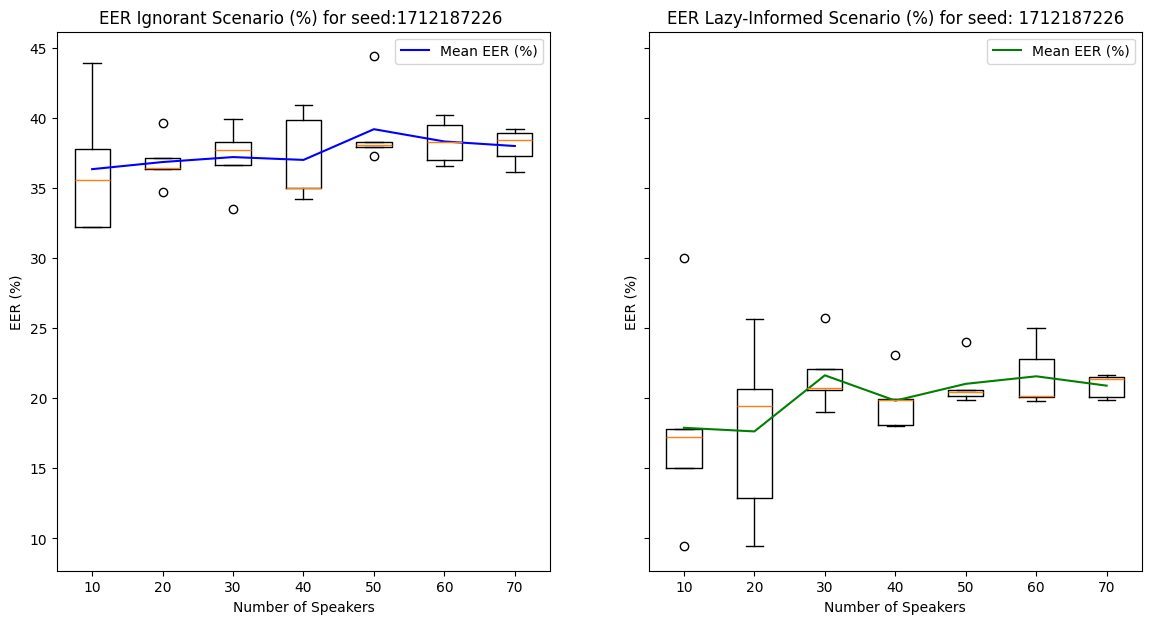

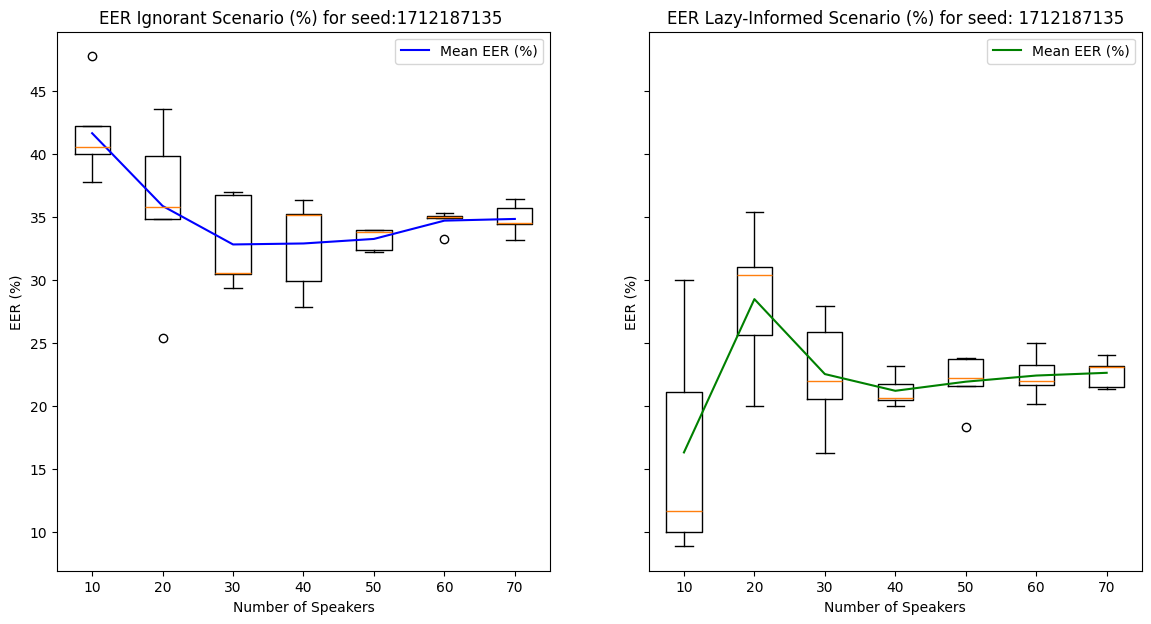

In [29]:
for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    # Adjusting EER values to percentages by multiplying by 100
    # Recalculating groups for plotting
    groups_ig_percent = df.groupby('num_of_speakers')['eer_ignorant'].apply(list)
    groups_lz_percent = df.groupby('num_of_speakers')['eer_lazy-informed'].apply(list)
    
    # Recalculating means for both scenarios across different numbers of speakers
    mean_ignorant_percent =df.groupby('num_of_speakers')['eer_ignorant'].mean()
    mean_lazy_informed_percent = df.groupby('num_of_speakers')['eer_lazy-informed'].mean()
    
    # Plotting updated data with mean lines reflecting EER percentages
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)
    
    # Ignorant scenario with mean line
    axs[0].boxplot(groups_ig_percent, labels=groups_ig_percent.index)
    axs[0].plot(range(1, len(mean_ignorant_percent) + 1), mean_ignorant_percent, color='blue', label='Mean EER (%)')
    axs[0].set_title(f"EER Ignorant Scenario (%) for seed:{df['file'].iloc[0]} ")
    axs[0].set_xlabel('Number of Speakers')
    axs[0].set_ylabel('EER (%)')
    axs[0].legend()

    # Lazy-informed scenario with mean line
    axs[1].boxplot(groups_lz_percent, labels=groups_lz_percent.index)
    axs[1].plot(range(1, len(mean_ignorant_percent) + 1), mean_lazy_informed_percent, color='green', label='Mean EER (%)')
    axs[1].set_title(f"EER Lazy-Informed Scenario (%) for seed: {df['file'].iloc[0]}")
    axs[1].set_xlabel('Number of Speakers')
    axs[1].set_ylabel('EER (%)')
    axs[1].legend()




##### Averaging over all target selections


In [30]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [31]:
# Aggregate and calculate overall mean and standard deviation for each number of speakers
overall_stats = full_df.groupby('num_of_speakers').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

# Display the overall statistics in a table
print("Overall statistics for ls-test-clean&other:")
display(overall_stats)

Overall statistics for ls-test-clean&other:


eer_ignorant           eer_lazy-informed          
                        mean       std              mean       std
num_of_speakers                                                   
10                 35.333333  7.671228         19.911111  7.663982
20                 35.089474  4.805593         22.236842  6.736384
30                 35.186207  3.435532         22.558621  3.459040
40                 35.325641  3.586304         21.674359  2.090641
50                 35.985306  2.682694         22.707755  2.201346
60                 36.066102  2.052738         22.709605  1.815891
70                 35.898137  1.897150         22.670807  1.232522

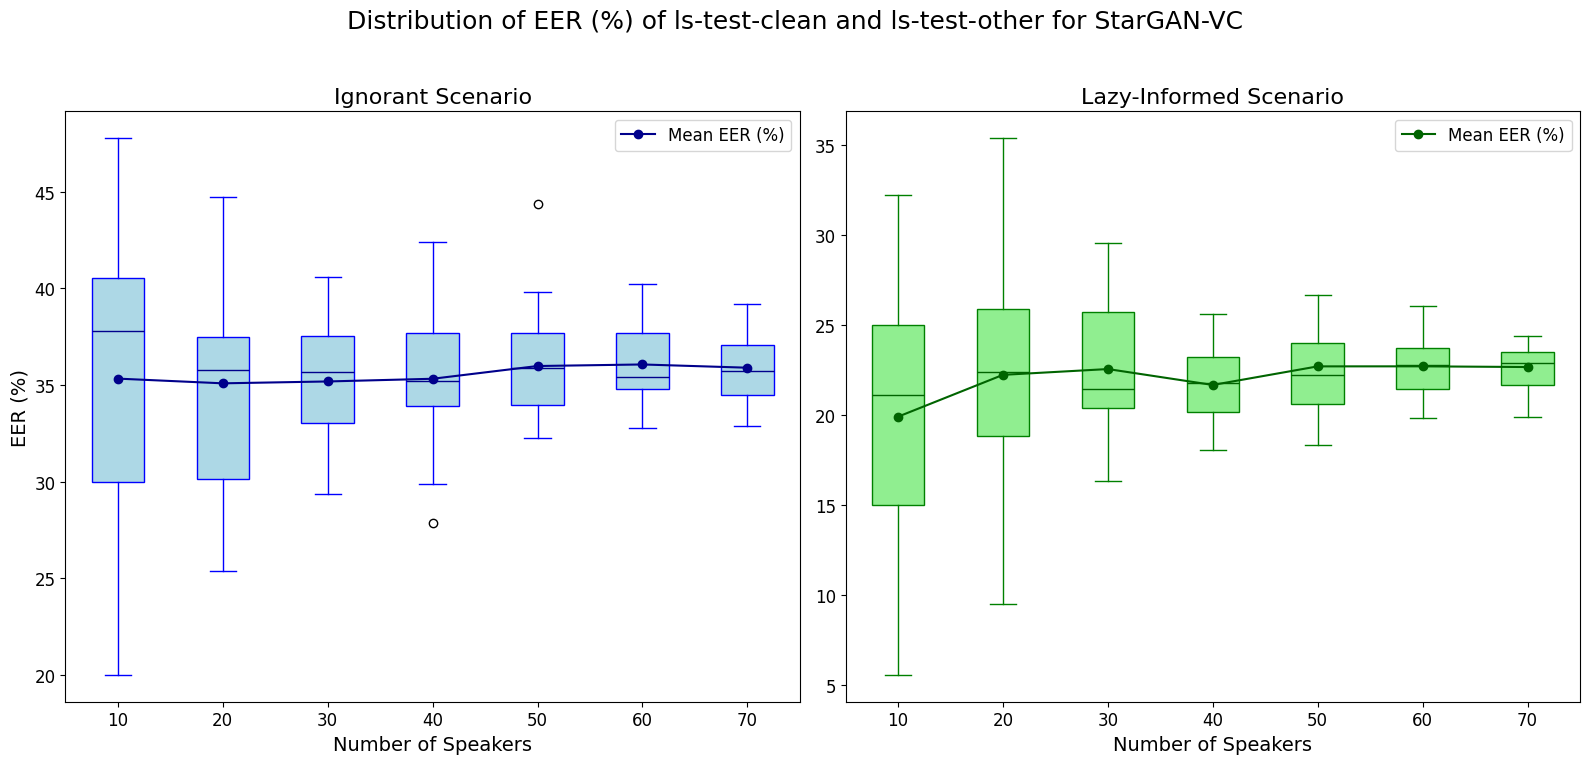

In [34]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
plt.suptitle('Distribution of EER (%) of ls-test-clean and ls-test-other for StarGAN-VC', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_speakers')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_speakers')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightblue', color='blue'),
               medianprops=dict(color='darkblue'),
               whiskerprops=dict(color='blue'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('Number of Speakers', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_speakers')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_speakers')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightgreen', color='green'),
               medianprops=dict(color='darkgreen'),
               whiskerprops=dict(color='green'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Lazy-Informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('Number of Speakers', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overal_stats/stargan_tco_speakes.png')
plt.savefig('overal_stats/stargan_tco_speakes.pdf')  


plt.show()


In [33]:
# Assuming full_df is your concatenated DataFrame from all files

# Prepare data for plotting
ignorant_means = full_df.groupby('num_of_speakers')['eer_ignorant'].mean().values
lazy_informed_means = full_df.groupby('num_of_speakers')['eer_lazy-informed'].mean().values



### 2. Evaluation with ls-train-other-500 (1166 speakers)
The speakers are increased by 50. We run the experiments for 4 different target selections (seeds).

In [35]:
file_pattern = "results_speakers/results_stargan_speakers/ls-train-other-500/stargan_to500_speakers#*.txt" 

Individual Evaluation for different target selections

In [36]:
all_files = glob.glob(file_pattern)

# Initialize an empty list to store dataframes
dfs = []

for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)

    # Calculating mean and standard deviation for EER in both scenarios
    eer_ignorant_stats = df.groupby('num_of_speakers')['eer_ignorant'].agg(['mean', 'std'])
    eer_lazy_informed_stats = df.groupby('num_of_speakers')['eer_lazy-informed'].agg(['mean', 'std'])
    
     # Enhancing clarity by specifying scenario names
    eer_ignorant_stats.columns = pd.MultiIndex.from_product([['Ignorant'], eer_ignorant_stats.columns])
    eer_lazy_informed_stats.columns = pd.MultiIndex.from_product([['Lazy-Informed'], eer_lazy_informed_stats.columns])

    # Combining both stats into a single DataFrame for a unified table
    combined_stats = pd.concat([eer_ignorant_stats, eer_lazy_informed_stats], axis=1)

    print(f"\nStatistics for seed: {df['file'].iloc[0]}")
    display(combined_stats)


Statistics for seed: 1712099042


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
50               27.253061  2.189036     13.424490  1.690949
100              26.463636  3.524354     13.346465  2.254474
150              26.054139  0.954719     14.803688  0.674836
200              26.377387  1.538445     14.779862  1.194196
250              28.174458  0.833557     15.237378  1.314786
300              26.159309  0.656121     14.534846  1.075315
350              27.090954  1.042570     15.120747  0.962024
400              27.094862  0.668190     14.537747  0.655242
450              26.657214  1.081259     14.213981  0.450132
500              27.044409  0.494194     14.957833  0.494331
550              27.581454  0.866989     14.974139  0.504073
600              26.878130  0.594334     15.545637  0.371048
650              26.998910  0.545418     14.572268  0.670178
700              26.486348  0.622509     14.898651  0.450583
750              26.875389  0.355002     14.685679  0.510002
800              27.186859  0.437551     14.714544  0.319695
850              26.727070  0.653460     14.547121  0.446898
900              26.856767  0.732244     14.586649  0.482745
950              26.999534  0.392707     14.858225  0.344660
1000             27.041692  0.264376     14.847563  0.205676


Statistics for seed: 1712189769


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
50               31.126531  3.239548     14.302041  1.707250
100              25.521212  1.414959     14.855556  1.805701
150              26.335570  2.351598     15.707383  1.446177
200              27.573367  2.067560     15.976633  1.407049
250              28.750361  2.362577     15.908594  0.983852
300              28.099331  1.615770     15.414827  0.912528
350              27.065248  0.786117     14.962341  0.700357
400              27.434524  1.290126     16.079261  0.739367
450              28.188320  0.436095     15.679980  0.329569
500              27.579760  0.422594     15.789419  0.353952
550              27.647094  0.971338     15.117900  0.522998
600              27.748275  0.449280     15.240818  0.507931
650              27.839113  0.354576     15.733080  0.552946
700              27.989986  0.294383     15.646045  0.349888
750              27.770307  0.338995     15.801962  0.533745
800              27.846308  0.491192     15.915425  0.469208
850              27.873221  0.324568     15.731761  0.328727
900              27.491719  0.352469     15.488061  0.278545
950              27.942998  0.325344     16.096157  0.344951
1000             27.556907  0.241466     15.698859  0.247719


Statistics for seed: 1712099157


Ignorant           Lazy-Informed          
                      mean       std          mean       std
num_of_speakers                                             
50               25.787755  1.377256     15.685714  1.787993
100              27.885859  2.916321     15.601010  3.621640
150              27.288143  0.591293     16.198210  1.145631
200              25.840704  1.502689     15.812563  1.723688
250              26.406104  1.572709     15.478876  0.999029
300              26.328986  1.690891     14.648161  0.974019
350              26.664347  1.365742     15.978305  1.366977
400              26.672556  0.392697     15.566792  0.749650
450              26.800742  0.237553     14.945558  0.513076
500              26.918758  0.725664     14.379599  0.644283
550              27.028879  0.548130     15.318563  1.083013
600              26.354925  0.701459     14.905147  0.669915
650              26.317056  1.125952     15.064075  0.485891
700              26.737462  0.185398     15.534112  0.456890
750              26.391420  0.463527     15.269604  0.343413
800              26.574578  0.624260     14.870745  0.323060
850              26.439687  0.511758     15.289392  0.179355
900              26.583896  0.537116     14.939402  0.384494
950              26.440941  0.206785     15.013366  0.256479
1000             26.344454  0.496075     14.982122  0.387737

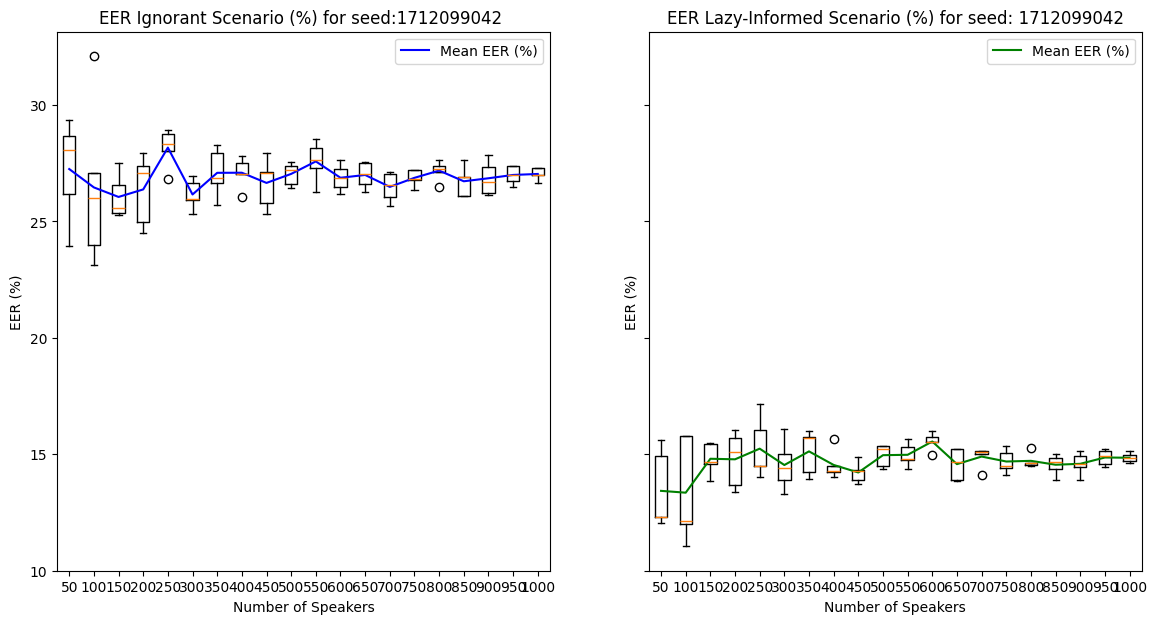

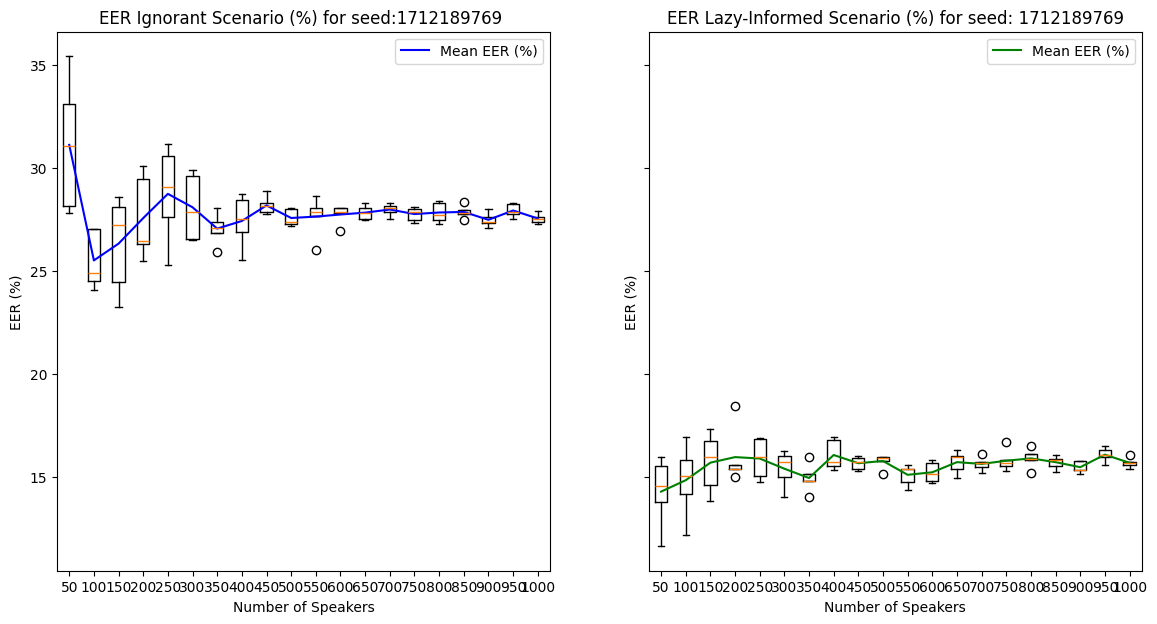

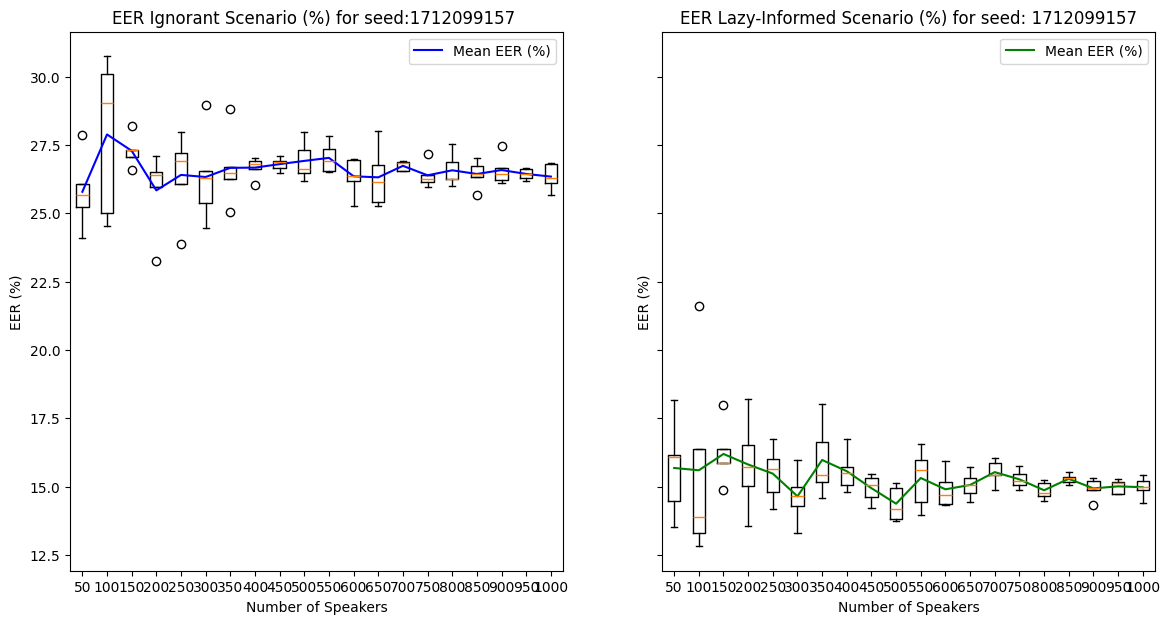

In [37]:
for filename in all_files:
    df = pd.read_csv(filename,  sep='\s+')
    # Multiply EER values by 100 to convert to percentages
    df['eer_ignorant'] *= 100
    df['eer_lazy-informed'] *= 100

    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    # Adjusting EER values to percentages by multiplying by 100
    # Recalculating groups for plotting
    groups_ig_percent = df.groupby('num_of_speakers')['eer_ignorant'].apply(list)
    groups_lz_percent = df.groupby('num_of_speakers')['eer_lazy-informed'].apply(list)
    
    # Recalculating means for both scenarios across different numbers of speakers
    mean_ignorant_percent =df.groupby('num_of_speakers')['eer_ignorant'].mean()
    mean_lazy_informed_percent = df.groupby('num_of_speakers')['eer_lazy-informed'].mean()
    
    # Plotting updated data with mean lines reflecting EER percentages
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7), sharey=True)
    
    # Ignorant scenario with mean line
    axs[0].boxplot(groups_ig_percent, labels=groups_ig_percent.index)
    axs[0].plot(range(1, len(mean_ignorant_percent) + 1), mean_ignorant_percent, color='blue', label='Mean EER (%)')
    axs[0].set_title(f"EER Ignorant Scenario (%) for seed:{df['file'].iloc[0]} ")
    axs[0].set_xlabel('Number of Speakers')
    axs[0].set_ylabel('EER (%)')
    axs[0].legend()

    # Lazy-informed scenario with mean line
    axs[1].boxplot(groups_lz_percent, labels=groups_lz_percent.index)
    axs[1].plot(range(1, len(mean_ignorant_percent) + 1), mean_lazy_informed_percent, color='green', label='Mean EER (%)')
    axs[1].set_title(f"EER Lazy-Informed Scenario (%) for seed: {df['file'].iloc[0]}")
    axs[1].set_xlabel('Number of Speakers')
    axs[1].set_ylabel('EER (%)')
    axs[1].legend()


Averaging over all target selections

In [38]:
all_dfs = []
for filename in all_files:
    df = pd.read_csv(filename, sep='\s+')
    df['eer_ignorant'] *= 100  # Convert to percentage
    df['eer_lazy-informed'] *= 100  # Convert to percentage
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    all_dfs.append(df)

full_df = pd.concat(all_dfs, ignore_index=True)



In [39]:
# Aggregate and calculate overall mean and standard deviation for each number of speakers
overall_stats = full_df.groupby('num_of_speakers').agg({'eer_ignorant': ['mean', 'std'], 'eer_lazy-informed': ['mean', 'std']})

# Display the overall statistics in a table
print("Overall Statistics for ls-train-other-500:")
display(overall_stats)

Overall Statistics for ls-train-other-500:


eer_ignorant           eer_lazy-informed          
                        mean       std              mean       std
num_of_speakers                                                   
50                 28.055782  3.216282         14.470748  1.868537
100                26.623569  2.750106         14.601010  2.659636
150                26.559284  1.496348         15.569760  1.208334
200                26.597152  1.762026         15.523019  1.456938
250                27.776975  1.888382         15.541616  1.066858
300                26.862542  1.584425         14.865945  1.001518
350                26.940183  1.030015         15.353798  1.073255
400                27.067314  0.866752         15.394600  0.937891
450                27.215425  0.956682         14.946506  0.740213
500                27.180975  0.599392         15.042284  0.763519
550                27.419142  0.807798         15.136867  0.712210
600                26.993777  0.808101         15.230534  0.560879
650                27.051693  0.947796         15.123141  0.725002
700                27.071265  0.780211         15.359603  0.518354
750                27.012372  0.692679         15.252415  0.641934
800                27.202581  0.723818         15.166904  0.653017
850                27.013326  0.798620         15.189425  0.594208
900                26.977461  0.652755         15.004704  0.527610
950                27.127824  0.705853         15.322583  0.641569
1000               26.981018  0.609442         15.176181  0.471338

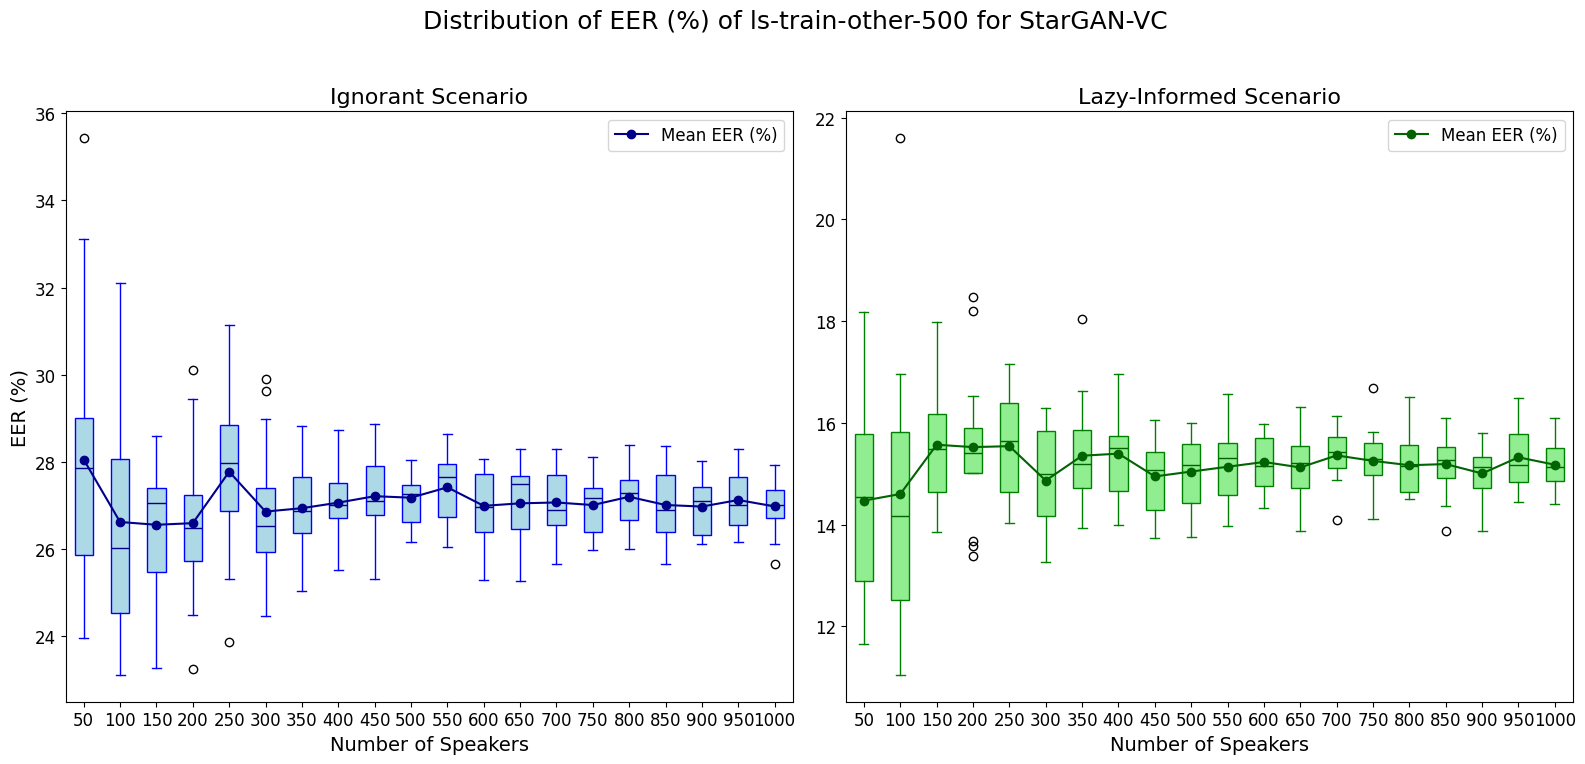

In [40]:
# Create the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 8), facecolor='white')

# Customizing the overall appearance
plt.suptitle('Distribution of EER (%) of ls-train-other-500 for StarGAN-VC', fontsize=18, fontweight='normal')

# Ignorant Scenario
ignorant_means = full_df.groupby('num_of_speakers')['eer_ignorant'].mean()
ignorant_data = [group['eer_ignorant'].values for _, group in full_df.groupby('num_of_speakers')]
axs[0].boxplot(ignorant_data, labels=ignorant_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightblue', color='blue'),
               medianprops=dict(color='darkblue'),
               whiskerprops=dict(color='blue'),
               capprops=dict(color='blue'))
axs[0].plot(range(1, len(ignorant_means) + 1), ignorant_means, color='darkblue', marker='o', linestyle='-', label='Mean EER (%)')
axs[0].set_title('Ignorant Scenario', fontsize=16, fontweight='normal')
axs[0].set_xlabel('Number of Speakers', fontsize=14)
axs[0].set_ylabel('EER (%)', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Lazy-Informed Scenario
lazy_informed_means = full_df.groupby('num_of_speakers')['eer_lazy-informed'].mean()
lazy_informed_data = [group['eer_lazy-informed'].values for _, group in full_df.groupby('num_of_speakers')]
axs[1].boxplot(lazy_informed_data, labels=lazy_informed_means.index, patch_artist=True, 
               boxprops=dict(facecolor='lightgreen', color='green'),
               medianprops=dict(color='darkgreen'),
               whiskerprops=dict(color='green'),
               capprops=dict(color='green'))
axs[1].plot(range(1, len(lazy_informed_means) + 1), lazy_informed_means, color='darkgreen', marker='o', linestyle='-', label='Mean EER (%)')
axs[1].set_title('Lazy-Informed Scenario', fontsize=16, fontweight='normal')
axs[1].set_xlabel('Number of Speakers', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('overal_stats/stargan_to500_speakes.png')
plt.savefig('overal_stats/stargan_to500_speakes.pdf')  

plt.show()

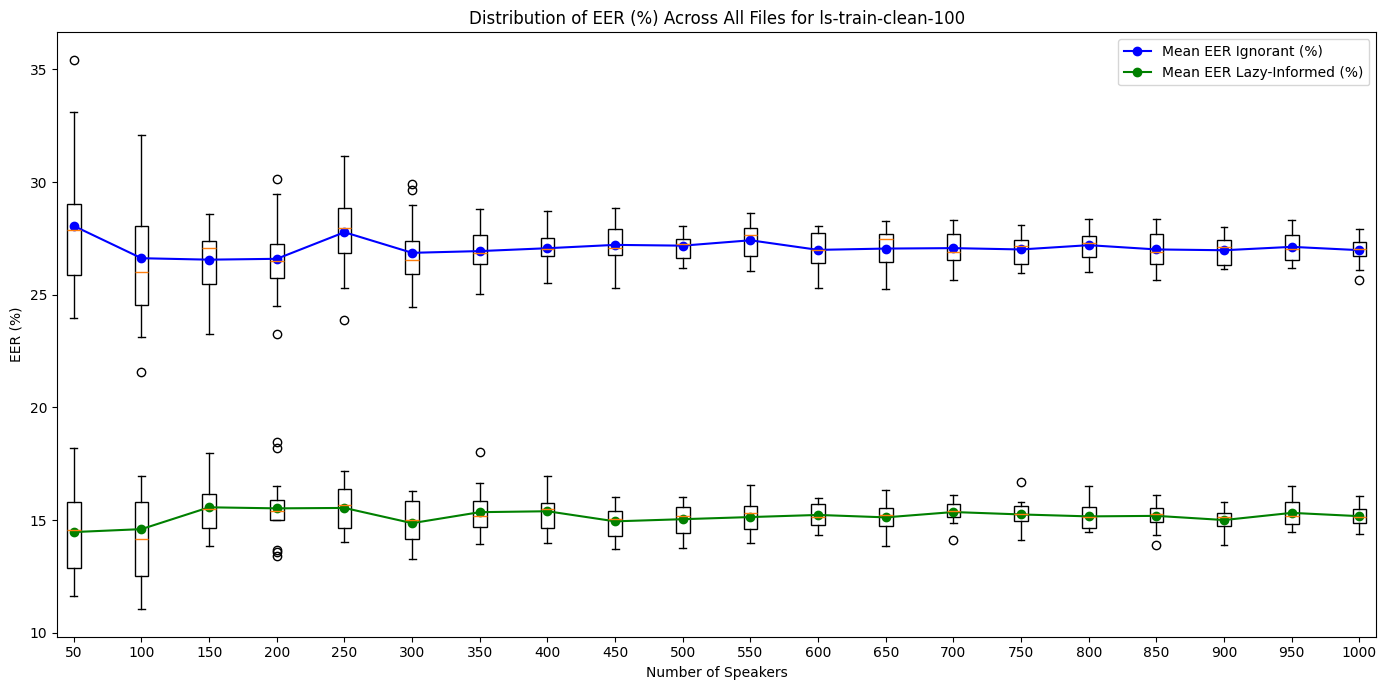

In [15]:
# Prepare data for plotting
ignorant_means = full_df.groupby('num_of_speakers')['eer_ignorant'].mean().values
lazy_informed_means = full_df.groupby('num_of_speakers')['eer_lazy-informed'].mean().values

# Getting unique number of speakers for plotting
unique_speakers = sorted(full_df['num_of_speakers'].unique())

# Prepare box plot data
ignorant_data = [full_df[full_df['num_of_speakers'] == speaker]['eer_ignorant'].values for speaker in unique_speakers]
lazy_informed_data = [full_df[full_df['num_of_speakers'] == speaker]['eer_lazy-informed'].values for speaker in unique_speakers]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 7))

# Position of bars on the x-axis
positions_ignorant = np.array(range(len(unique_speakers))) * 2.0 
positions_lazy_informed = np.array(range(len(unique_speakers))) * 2.0 

# Plotting box plots
bp_ignorant = ax.boxplot(ignorant_data, positions=positions_ignorant, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_speakers)
bp_lazy_informed = ax.boxplot(lazy_informed_data, positions=positions_lazy_informed, widths=0.4, patch_artist=True, boxprops=dict(facecolor="white"), labels=unique_speakers)

# Plotting mean lines
ax.plot(positions_ignorant, ignorant_means, color='blue', marker='o', linestyle='-', label='Mean EER Ignorant (%)')
ax.plot(positions_lazy_informed , lazy_informed_means, color='green', marker='o', linestyle='-', label='Mean EER Lazy-Informed (%)')

# Customizing the plot
ax.set_title('Distribution of EER (%) Across All Files for ls-train-clean-100')
ax.set_xlabel('Number of Speakers')
ax.set_ylabel('EER (%)')
ax.legend()

plt.xticks(np.arange(min(positions_ignorant), max(positions_lazy_informed)+1, 2.0), labels=unique_speakers)
plt.tight_layout()
plt.show()